# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### Answer: "The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts"

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time
import warnings
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [2]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
u = df['pdays'].unique()
u

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [6]:
value_counts = df['pdays'].value_counts()
print(value_counts)

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [7]:
df.shape

(41188, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [12]:
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values in marital:
['married' 'single' 'divorced' 'unknown']

Unique values in education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values in default:
['no' 'unknown' 'yes']

Unique values in housing:
['no' 'yes' 'unknown']

Unique values in loan:
['no' 'yes' 'unknown']

Unique values in contact:
['telephone' 'cellular']

Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique values in day_of_week:
['mon' 'tue' 'wed' 'thu' 'fri']

Unique values in poutcome:
['nonexistent' 'failure' 'success']

Unique values in y:
['no' 'yes']



In [13]:
# Removing duration becuase it's highly predictive of the output variable due to its nature of containing the output variable as part of it's data point
df = df.drop('duration', axis=1)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

#### Business Objective: We want to find the most effective model for accurately predicting customer subscriptions. We will do this by training the model on historical data where the target value indicates whether a subscribed to a term deposit or not ('yes' or ' no'). By doing so, we can better target our marketing efforts and allocate resources to reach potential customers who are likely to subscribe to the term deposit. This could lead to higher conversion rates, optimized marketing campaigns, and improved business outcomes.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
df_bank = df.iloc[:, :7]

In [16]:
df_target = df['y']

In [17]:
one_hot_columns = ['job', 'marital', 'default','education', 'housing', 'loan']
df_encoded = pd.get_dummies(df_bank, columns=one_hot_columns)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_target, test_size=0.2, random_state=42)

In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32950, 34)
X_test shape: (8238, 34)
y_train shape: (32950,)
y_test shape: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [20]:
majority_class = y_train.value_counts().idxmax()
baseline_accuracy = (y_test == majority_class).mean()

In [21]:
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.8865015780529255


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [22]:
logreg = LogisticRegression()

In [23]:
logreg.fit(X_train, y_train)

/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = logreg.predict(X_test)

In [25]:
accuracy = (y_pred == y_test).mean()

### Problem 9: Score the Model

What is the accuracy of your model?

In [26]:
print("Accuracy:", accuracy)

Accuracy: 0.8865015780529255


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [27]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000), 
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

In [28]:
model_names = []
train_times = []
train_accuracies = []
test_accuracies = []
model_params = []

In [29]:
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    model_params.append(model.get_params())
    
    model_names.append(model_name)
    train_times.append(train_time)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [30]:
results_df = pd.DataFrame({
    'Model': model_names,
    'Train Time': train_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Parameters': model_params
})

In [31]:
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy  \
0  Logistic Regression    0.658285        0.887557       0.886502   
1                  KNN    0.025543        0.890744       0.874605   
2        Decision Tree    0.122114        0.916601       0.862102   
3                  SVM   13.948848        0.887557       0.886502   

                                          Parameters  
0  {'C': 1.0, 'class_weight': None, 'dual': False...  
1  {'algorithm': 'auto', 'leaf_size': 30, 'metric...  
2  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  
3  {'C': 1.0, 'break_ties': False, 'cache_size': ...  


In [32]:
pd.set_option('display.max_colwidth', -1)
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy  \
0  Logistic Regression  0.658285    0.887557        0.886502        
1  KNN                  0.025543    0.890744        0.874605        
2  Decision Tree        0.122114    0.916601        0.862102        
3  SVM                  13.948848   0.887557        0.886502        

                                                                                                                                                                                                                                                                                Parameters  
0  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}    
1  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': No

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

# Logistic Regression

In [33]:
param_grid = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10, 100],
    'max_iter': [1000]
}

In [34]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [1000],
                         'penalty': ['l2']})

In [35]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [36]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}


In [37]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8865015780529255


In [38]:
param_grid = {
    'penalty': ['l2'],
    'C': [0.1, 0.01, 0.001, 0.0001],
    'max_iter': [1000]
}

In [39]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.01, 0.001, 0.0001], 'max_iter': [1000],
                         'penalty': ['l2']})

In [40]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [41]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}


In [42]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8865015780529255


In [43]:
param_grid = {
    'penalty': ['none'],
    'C': [0.1],
    'max_iter': [1000]
}

In [44]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/vic

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1], 'max_iter': [1000], 'penalty': ['none']})

In [45]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [46]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'C': 0.1, 'max_iter': 1000, 'penalty': 'none'}


In [47]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8865015780529255


In [48]:
logreg = LogisticRegression()

In [49]:
param_grid = {
    'penalty': ['l2'],
    'C': [0.1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [1000]
}

In [50]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vic

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1], 'max_iter': [1000], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [51]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [52]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.8875569044006071


In [53]:
param_grid = {
    'penalty': ['l2'],
    'C': [0.1],
    'solver': ['newton-cg'],
    'multi_class' : ['auto', 'ovr', 'multinomial'],
    'max_iter': [1000]
}

In [54]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1], 'max_iter': [1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2'], 'solver': ['newton-cg']})

In [55]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [56]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.1, 'max_iter': 1000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.8875569044006071


In [57]:
logreg = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg', max_iter= 1000)


In [58]:
param_grid = {
    'verbose': [0, 1, 2, 3]
}

In [59]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jo

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.1, max_iter=1000,
                                          solver='newton-cg'),
             param_grid={'verbose': [0, 1, 2, 3]})

In [60]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [61]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'verbose': 0}
Best Score: 0.8875569044006071


In [62]:
y_pred = grid_search.predict(X_test)
report = classification_report(y_test, y_pred)

/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [63]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7303
         yes       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



In [64]:
cm = confusion_matrix(y_test, y_pred)

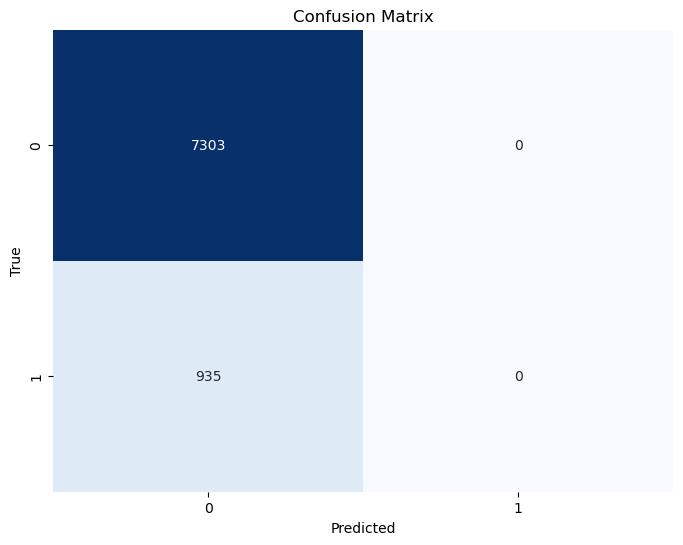

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [66]:
logreg = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg',max_iter= 1000)

## Best Logistic Regression => 
### Accuracy: 8875569044006071
#### C: 0.1
#### multi_class: auto
#### penalty: l2
#### solver: newton-cg
#### verbose: 0

# K Nearest Neighbors

In [67]:
knn = KNeighborsClassifier()

In [68]:
param_grid = {
    'n_neighbors': [3,5,7],
    'weights': ['uniform', 'distance']
}

In [69]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [70]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [71]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 7, 'weights': 'uniform'}


In [72]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8792182568584608


In [73]:
param_grid = {
    'n_neighbors': [7,9,11],
    'weights': ['uniform']
}

In [74]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 9, 11], 'weights': ['uniform']})

In [75]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [76]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 11, 'weights': 'uniform'}


In [77]:
param_grid = {
    'n_neighbors': [11,15,19],
    'weights': ['uniform']
}

In [78]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [11, 15, 19], 'weights': ['uniform']})

In [79]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [80]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 19, 'weights': 'uniform'}


In [81]:
param_grid = {
    'n_neighbors': [19,27,35],
    'weights': ['uniform']
}

In [82]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [19, 27, 35], 'weights': ['uniform']})

In [83]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [84]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 35, 'weights': 'uniform'}


In [85]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8856518572469045


In [86]:
param_grid = {
    'n_neighbors': [35,51,67],
    'weights': ['uniform']
}

In [87]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [35, 51, 67], 'weights': ['uniform']})

In [88]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [89]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 67, 'weights': 'uniform'}


In [90]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8860160233066279


Will continue this because the more n_neighbors the closer it gets to the accuracy of the baseline.

In [91]:
param_grid = {
    'n_neighbors': [67,99,131],
    'weights': ['uniform']
}

In [92]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [67, 99, 131], 'weights': ['uniform']})

In [93]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [94]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 99, 'weights': 'uniform'}


In [95]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8867443554260743


In [96]:
param_grid = {
    'n_neighbors': [83,99,115],
    'weights': ['uniform']
}

In [97]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [83, 99, 115], 'weights': ['uniform']})

In [98]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [99]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 115, 'weights': 'uniform'}


In [100]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8862588006797767


In [101]:
param_grid = {
    'n_neighbors': [107,115,123],
    'weights': ['uniform']
}

In [102]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [107, 115, 123],
                         'weights': ['uniform']})

In [103]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [104]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 107, 'weights': 'uniform'}


In [105]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8862588006797767


In [106]:
param_grid = {
    'n_neighbors': [103,107,111],
    'weights': ['uniform']
}

In [107]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [103, 107, 111],
                         'weights': ['uniform']})

In [108]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [109]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 103, 'weights': 'uniform'}


In [110]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8862588006797767


In [111]:
param_grid = {
    'n_neighbors': [101,103,105],
    'weights': ['uniform']
}

In [112]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [101, 103, 105],
                         'weights': ['uniform']})

In [113]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [114]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 105, 'weights': 'uniform'}


In [115]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8861374119932023


In [116]:
param_grid = {
    'n_neighbors': [104,105,106],
    'weights': ['uniform']
}

In [117]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [104, 105, 106],
                         'weights': ['uniform']})

In [118]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [119]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_neighbors': 105, 'weights': 'uniform'}


In [120]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8861374119932023


In [121]:
knn = KNeighborsClassifier(n_neighbors=105, weights = 'distance')

In [122]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=105, weights='distance')

In [123]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.872784656470017


## Best K Nearest Neighbors => 
### Accuracy: 0.872784656470017
#### n_neighors = 105
#### weights = distance

# Decision Tree

In [124]:
dt = DecisionTreeClassifier()

In [125]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [126]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [127]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [128]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [129]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8869871327992231


In [130]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [ 5],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1]
}

In [131]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [3, 5, 7]})

In [132]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [133]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [134]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8869871327992231


In [135]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1]
}

In [136]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4]})

In [137]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [138]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [139]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8869871327992231


In [140]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

In [141]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [142]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8869871327992231


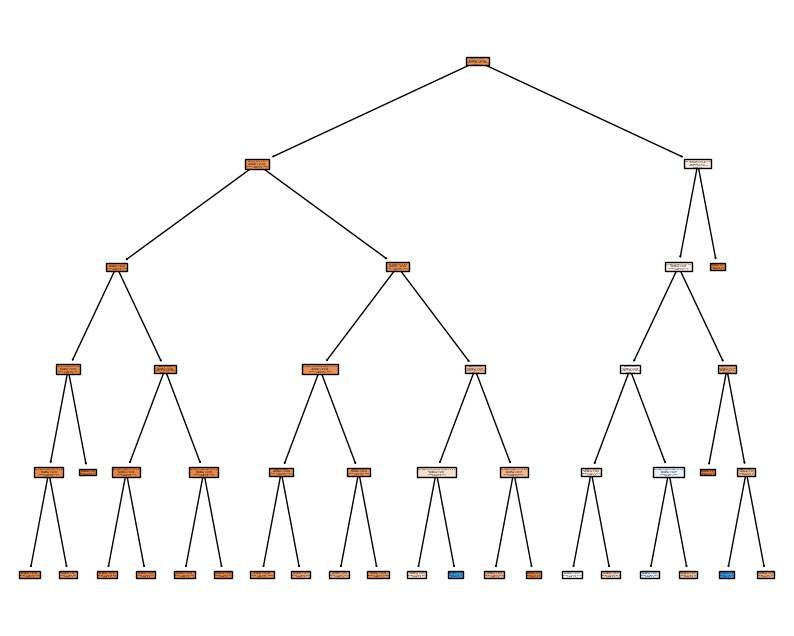

In [143]:
plt.figure(figsize=(10, 8))
tree.plot_tree(dt, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()

## Best Decision Tree => 
### Accuracy: 0.8869871327992231
#### criterion: entropy 
#### max_depth: 5
#### min_samples_leaf: 1 
#### min_samples_split: 2

# Support Vector Machines

In [144]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [145]:
svm1 = SVC()

In [146]:
svm1 = SVC(C=1.0, kernel='rbf', gamma='scale')

In [147]:
svm1.fit(X_train, y_train)

SVC()

In [148]:
y_pred = svm1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print("Test Accuracy1:", accuracy1)

Test Accuracy1: 0.8865015780529255


In [149]:
svm2 = SVC()

In [150]:
svm2 = SVC(C=0.1, kernel='rbf', gamma='scale')

In [151]:
svm2.fit(X_train, y_train)

SVC(C=0.1)

In [152]:
y_pred = svm2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print("Test Accuracy2:", accuracy2)

Test Accuracy2: 0.8865015780529255


In [153]:
svm3 = SVC()

In [154]:
svm3 = SVC(C=10, kernel='rbf', gamma='scale')

In [155]:
svm3.fit(X_train, y_train)

SVC(C=10)

In [156]:
y_pred = svm3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print("Test Accuracy3:", accuracy3)

Test Accuracy3: 0.8863801893663511


We will go with SVC C=1 for the rest of the tests. It takes too long to do a Grid Search of this.

In [157]:
# Testing SVM4 against SVM1 and change kernal from rbf to linear
svm4 = SVC(C=1,kernel ='linear', gamma='scale')

In [158]:
svm4.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [159]:
y_pred = svm4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred)
print("Test Accuracy4:", accuracy4)

Test Accuracy4: 0.8865015780529255


Appears that rbf performed better than linear. Now for the last one. Scale vs auto. We will compare SVM5 vs SVM1 and only changing gamma scale vs auto keeping C at 1 and kernel at rbf

In [160]:
# Testing SVM4 against SVM1 and change kernal from rbf to linear
svm5 = SVC(C=1,kernel ='rbf', gamma='auto')

In [161]:
svm5.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [162]:
y_pred = svm5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred)
print("Test Accuracy5:", accuracy5)

Test Accuracy5: 0.8866229667394999


# IN ORDER OF MOST ACCURATE MODEL
### (I get different results each time I run it but from the last time I ran it, these were the results)

## Logistic Regression 
### Accuracy: 8875569044006071
#### C: 0.1
#### multi_class: auto
#### penalty: l2
#### solver: newton-cg
#### verbose: 0

## Decision Tree 
### Accuracy: 0.8869871327992231
#### criterion: entropy 
#### max_depth: 5
#### min_samples_leaf: 1 
#### min_samples_split: 2

## SVC 
### Accuracy: 0.8866229667394999
#### C=1 
#### kernal = rbf
#### gamma = auto

## K Nearest Neighbors
### Accuracy: 0.872784656470017
#### n_neighors = 105
#### weights = distance

# Questions

#### I wonder if I use logistic regression with the best paramaters on the whole data set, or partitions of the dataset with feature enginnering, if we get higher accuracy, or not. I will compute coefficients for each run and select the best model with the best selection of features.

In [163]:
df_target = df[['y']].copy()

In [164]:
df_start = df.drop(columns=['y'])

In [165]:
df_start = pd.get_dummies(df_start, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [166]:
X_train, X_test, y_train, y_test = train_test_split(df_start, df_target, test_size=0.2, random_state=42)


In [167]:
logreg = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg', verbose=0)
logreg.fit(X_train, y_train)


/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.1, solver='newton-cg')

In [168]:
y_pred = logreg.predict(X_test)


In [169]:
y_test_array = np.ravel(y_test)

In [170]:
accuracy = (y_pred == y_test_array).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8973051711580481


Sure enough we did. I'm surious what coefficients exist for this model?


In [171]:
coefficients = logreg.coef_

In [172]:
print("Coefficients:", coefficients)

Coefficients: [[ 1.03658787e-05 -5.20956984e-02 -1.31347466e-03 -4.62730109e-02
  -8.95601911e-01  1.02240088e+00  1.57609053e-02  3.21120248e-01
  -3.96458836e-03  3.57312919e-02 -7.37227820e-02 -2.48998418e-02
  -9.08159640e-02 -2.75358388e-02  2.33152719e-01 -9.29519724e-02
  -7.85114904e-02  1.86815846e-01  8.85448617e-02  3.87590787e-02
  -1.96028633e-01 -5.51333747e-02 -2.33464846e-02  5.13685035e-03
   7.18802836e-02 -3.87426767e-02  3.73418434e-02 -6.77927793e-02
  -3.29309001e-02  1.03690366e-01 -4.95879672e-02  6.57197920e-02
  -1.91604038e-02  1.20688196e-01 -1.08243193e-01 -1.39077286e-02
   1.14554747e-02  1.00845831e-02 -2.30027832e-02 -7.18455959e-03
   1.00845831e-02 -4.36274895e-03  3.16207183e-01 -3.17669908e-01
   1.67383874e-02  1.68543707e-01  1.08834522e-01  1.20316644e-01
  -2.06186519e-01  1.08359778e+00 -5.53890465e-01 -5.14802202e-01
  -9.55600870e-02 -1.29054490e-01 -2.61892769e-02 -2.10901396e-01
   8.34334559e-02  3.30610935e-02  1.19133399e-01 -3.44210201e

In [173]:
df_start.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [174]:
coefficients_df = pd.DataFrame({'Feature': df_start.columns, 'Coefficient': coefficients[0]})

In [175]:
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

In [176]:
coefficients_df.head()

,Feature,Coefficient
49,month_mar,1.083598
5,cons.price.idx,1.022401
7,euribor3m,0.321120
42,contact_cellular,0.316207
14,job_retired,0.233153


Removing all features from df_start into df_start2 that have coefficient values of below absolute value .2.

In [177]:
selected_features = coefficients_df[abs(coefficients_df['Coefficient']) >= 0.2]['Feature']

In [178]:
df_start2 = df_start[selected_features]

In [179]:
df_start2

,month_mar,cons.price.idx,euribor3m,contact_cellular,job_retired,poutcome_success,month_jun,day_of_week_mon,contact_telephone,poutcome_failure,month_nov,month_may,emp.var.rate
0,0,93.994,4.857,0,0,0,0,1,1,0,0,1,1.1
1,0,93.994,4.857,0,0,0,0,1,1,0,0,1,1.1
2,0,93.994,4.857,0,0,0,0,1,1,0,0,1,1.1
3,0,93.994,4.857,0,0,0,0,1,1,0,0,1,1.1
4,0,93.994,4.857,0,0,0,0,1,1,0,0,1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,94.767,1.028,1,1,0,0,0,0,0,1,0,-1.1
41184,0,94.767,1.028,1,0,0,0,0,0,0,1,0,-1.1
41185,0,94.767,1.028,1,1,0,0,0,0,0,1,0,-1.1
41186,0,94.767,1.028,1,0,0,0,0,0,0,1,0,-1.1


In [180]:
X_train, X_test, y_train, y_test = train_test_split(df_start2, df_target, test_size=0.2, random_state=42)

In [181]:
logreg = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg', verbose=0)
logreg.fit(X_train, y_train)

/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, solver='newton-cg')

In [182]:
y_pred = logreg.predict(X_test)

In [183]:
y_test_array = np.ravel(y_test)

In [184]:
accuracy = (y_pred == y_test_array).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8971837824714737


Accuracy went down from .8973 to .8972. We will keep the model above trained on df_start. 

Removing all features from df_start into df_start3 that have coefficient values of below absolute value .1.

In [186]:
selected_features = coefficients_df[abs(coefficients_df['Coefficient']) >= 0.1]['Feature']

In [187]:
df_start3 = df_start[selected_features]

In [188]:
df_start3

,month_mar,cons.price.idx,euribor3m,contact_cellular,job_retired,poutcome_success,job_student,month_aug,default_no,month_jul,...,default_unknown,month_sep,job_unknown,month_jun,day_of_week_mon,contact_telephone,poutcome_failure,month_nov,month_may,emp.var.rate
0,0,93.994,4.857,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,1.1
1,0,93.994,4.857,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,1.1
2,0,93.994,4.857,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,1.1
3,0,93.994,4.857,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,1.1
4,0,93.994,4.857,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,94.767,1.028,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,-1.1
41184,0,94.767,1.028,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,-1.1
41185,0,94.767,1.028,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,-1.1
41186,0,94.767,1.028,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,-1.1


In [189]:
X_train, X_test, y_train, y_test = train_test_split(df_start3, df_target, test_size=0.2, random_state=42)

In [190]:
logreg = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg', verbose=0)
logreg.fit(X_train, y_train)

/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, solver='newton-cg')

In [203]:
y_pred = logreg.predict(X_test)

In [204]:
y_test_array = np.ravel(y_test)

In [205]:
accuracy = (y_pred == y_test_array).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8975479485311969


Accuracy went up from .8973 to .8975. We will keep the model above trained on df_start3 which removed all features that had less than coefficient 0.1. 

In [194]:
df_start3.columns

Index(['month_mar', 'cons.price.idx', 'euribor3m', 'contact_cellular',
       'job_retired', 'poutcome_success', 'job_student', 'month_aug',
       'default_no', 'month_jul', 'day_of_week_wed', 'poutcome_nonexistent',
       'month_dec', 'education_illiterate', 'default_unknown', 'month_sep',
       'job_unknown', 'month_jun', 'day_of_week_mon', 'contact_telephone',
       'poutcome_failure', 'month_nov', 'month_may', 'emp.var.rate'],
      dtype='object')

These are the final columns we should train our models on.